In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

Choosen palette: 'deep' qualitative color palette de seaborn

In [2]:
base_dir = "/Users/lmatayoshi/Documents/Projects/tesis_notebooks/final_v2_experiments/dev/dct/"
eers_dir = base_dir + "n_coefficients/"

In [3]:
degree_2_raw_filename = eers_dir + "degree_2_raw/svm_eer_results"
degree_2_duration_filename = eers_dir + "degree_2_duration/svm_eer_results"
degree_3_raw_filename = eers_dir + "degree_3_raw/svm_eer_results"
degree_3_duration_filename = eers_dir + "degree_3_duration/svm_eer_results"

In [4]:
kappa_phonemes = ["b", "m", "B", "s", "D", "G", "w", "i"]

In [5]:
sanity_phonemes = ['G', 'b', 'w', 'B', 'D', 'm', 'i', 's']

In [6]:
def dictionary_by_phoneme(filename):
    with open(filename, "r") as f:
        lines = []
        for line in f.readlines():
            line = line.strip().split(":")
            lines.append(line)
    lines = lines[:-1]
    lines = [(l[0], float(l[1])) for l in lines if l[0] in sanity_phonemes]
    return dict(lines)

In [7]:
B: 0.225165562915
D: 0.231225296443
G: 0.206896551725
i: 0.257352941177
m: 0.202127659575
s: 0.292409577178
b: 0.191150442478
w: 0.134078212291

SyntaxError: invalid syntax (<ipython-input-7-b4e9b0558c82>, line 1)

In [8]:
dictionary_by_phoneme(degree_2_duration_filename)

{'B': 0.228826475071,
 'D': 0.254355400698,
 'G': 0.23232740802,
 'b': 0.17803030303,
 'i': 0.276292548573,
 'm': 0.157699443414,
 's': 0.3125,
 'w': 0.170928667564}

In [9]:
dictionary_by_phoneme(degree_3_duration_filename)

{'B': 0.235981308411,
 'D': 0.245893479343,
 'G': 0.234234234234,
 'b': 0.187341772153,
 'i': 0.270597738289,
 'm': 0.156771799629,
 's': 0.314583333332,
 'w': 0.169582772544}

In [10]:
def mean_kappa_values_by_experiment(filename):
    with open(filename, "r") as f:
        lines = []
        for line in f.readlines():
            line = line.strip().split(":")
            lines.append(line)
    lines = lines[:-1]
    values = [float(l[1]) for l in lines if l[0] in kappa_phonemes]
    return np.mean(np.array(values))

In [11]:
results_dict = {}

In [12]:
results_dict['degree_2_raw'] = mean_kappa_values_by_experiment(degree_2_raw_filename)
results_dict['degree_2_duration'] = mean_kappa_values_by_experiment(degree_2_duration_filename)
results_dict['degree_3_raw'] = mean_kappa_values_by_experiment(degree_3_raw_filename)
results_dict['degree_3_duration'] = mean_kappa_values_by_experiment(degree_3_duration_filename)

In [13]:
results_dict

{'degree_2_duration': 0.22637003079624998,
 'degree_2_raw': 0.229417737484375,
 'degree_3_duration': 0.226873304741875,
 'degree_3_raw': 0.22935984070624998}

In [14]:
(results_dict['degree_2_raw'] - results_dict['degree_2_duration']) / results_dict['degree_2_raw']

0.013284529441986078

In [15]:
(results_dict['degree_3_raw'] - results_dict['degree_3_duration']) / results_dict['degree_3_raw']

0.010841200258590969

## El mejor sistema está conformado por DCT con 2 coefficientes

In [16]:
(results_dict['degree_2_duration'] - results_dict['degree_3_duration']) 

-0.00050327394562502126

## Plot Legendre vs DCT n_coefficients

Valores tomados de ys_both

In [17]:
legendre_by_n_coefficients = [0.2372540617545,
 0.22238856830737497,
 0.219004746138625,
 0.219052028093625,
 0.22063522473137498,
 0.222921521471,
 0.225239761768
]

In [18]:
dct_by_n_coefficients = [0.23879212281000001,
 0.22649287792200001,
 0.22674264755512502,
 0.22976453797625002,
 0.23023906660475002,
 0.231152358068375,
 0.23071800721200003
 ]

In [19]:
xs_legendre = range(1,8)
xs_dct = range(1,8)

In [20]:
#a6cee3 (light blue)
#1f78b4 (dark blue)
#b2df8a (green)

In [21]:
colors = sns.color_palette("deep", 2)

/Users/lmatayoshi/Documents/Projects/svm/env/lib/python2.7/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


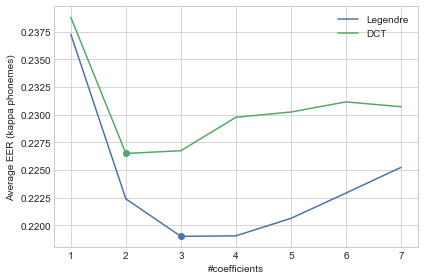

In [22]:
plt.clf()
sns.set_style("whitegrid")
plt.plot(xs_legendre, legendre_by_n_coefficients, label="Legendre", color=colors[0])
plt.plot(xs_legendre[2], legendre_by_n_coefficients[2], marker='o', color=colors[0])
plt.plot(xs_dct, dct_by_n_coefficients, label="DCT", color=colors[1])
plt.plot(xs_dct[1], dct_by_n_coefficients[1], marker='o', color=colors[1])
plt.legend()
plt.xlabel("#coefficients")
plt.ylabel("Average EER (kappa phonemes)")
plt.savefig("/Users/lmatayoshi/Documents/Projects/tesis_notebooks/final_v2_experiments/dev/plots/legendre_dct_coefficients.png")
plt.show()

In [26]:
legendre = legendre_by_n_coefficients[2]
dct = dct_by_n_coefficients[1]

In [29]:
relative = (dct - legendre)/dct
relative

0.033061224052942574

In [23]:
plt.plot(xs_legendre, legendre, label= "Legendre degree", color="#2385D2")
plt.plot(xs_legendre[3], legendre[3], marker='o', color="#2385D2")
plt.plot(xs_dct, dct, label= "DCT #coefficients", color="green")
plt.plot(xs_dct[2], dct[2], label= "DCT #coefficients", marker='o', color="green")
plt.legend()
plt.xlabel("Degree / #Coefficients")
plt.ylabel("Mean EER over Kappa")
plt.savefig(output_filename)
plt.show()

NameError: name 'legendre' is not defined